✅ Archivos cargados desde: data/workout_geo.csv


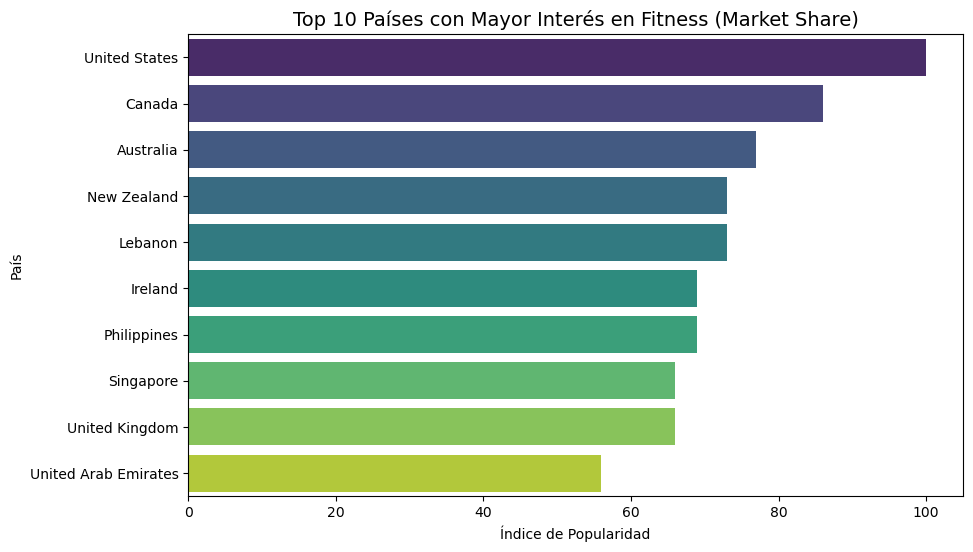

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Función para encontrar la ruta correcta
def get_path(filename):
    # Lista de posibles lugares donde puede estar el archivo
    posibles_rutas = [f"datos/{filename}", f"data/{filename}", filename]
    for ruta in posibles_rutas:
        if os.path.exists(ruta):
            return ruta
    return None

# 2. Cargar archivos con nombres dinámicos
try:
    path_workout = get_path("workout.csv")
    path_keywords = get_path("three_keywords.csv")
    path_geo = get_path("workout_geo.csv")

    if not path_geo:
        raise FileNotFoundError("¡Ups! workout_geo.csv no aparece en ninguna carpeta.")

    df_workout = pd.read_csv(path_workout, parse_dates=['month'])
    df_keywords = pd.read_csv(path_keywords, parse_dates=['month'])
    df_geo = pd.read_csv(path_geo) # Cargamos primero para ver columnas

    print(f"✅ Archivos cargados desde: {path_geo}")
    
    # 3. Limpiar y preparar Geografía (Top 10 países)
    # Detectamos el nombre de la columna de interés (puede ser 'workout_2018_2023')
    col_interes = df_geo.columns[1] 
    df_geo_clean = df_geo.dropna().sort_values(by=col_interes, ascending=False).head(10)

    # 4. Gráfica de Mercados Potenciales
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_geo_clean, x=col_interes, y='country', palette='viridis')
    plt.title("Top 10 Países con Mayor Interés en Fitness (Market Share)", fontsize=14)
    plt.xlabel("Índice de Popularidad")
    plt.ylabel("País")
    plt.show()

except Exception as e:
    print(f"❌ Error crítico: {e}")
    print(f"Archivos que Python ve ahora mismo: {os.listdir('datos' if os.path.exists('datos') else '.')}")

✅ Archivos cargados correctamente. Generando gráficas...


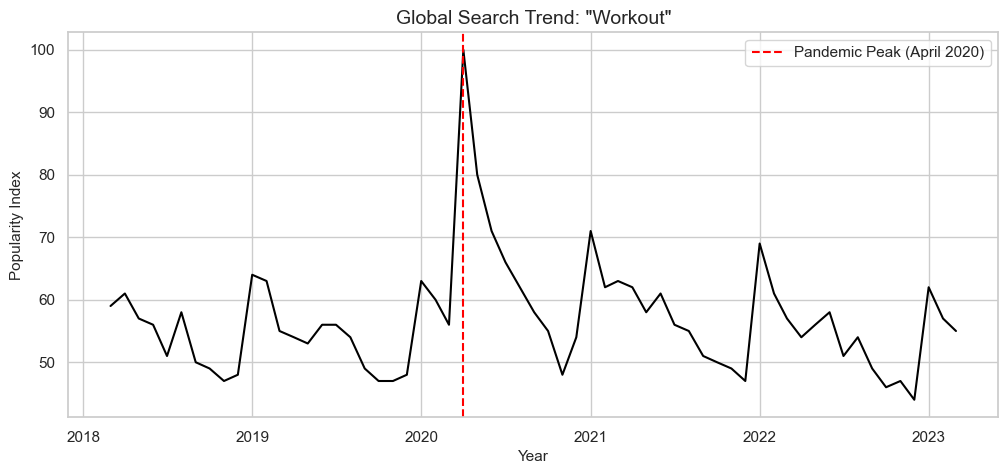

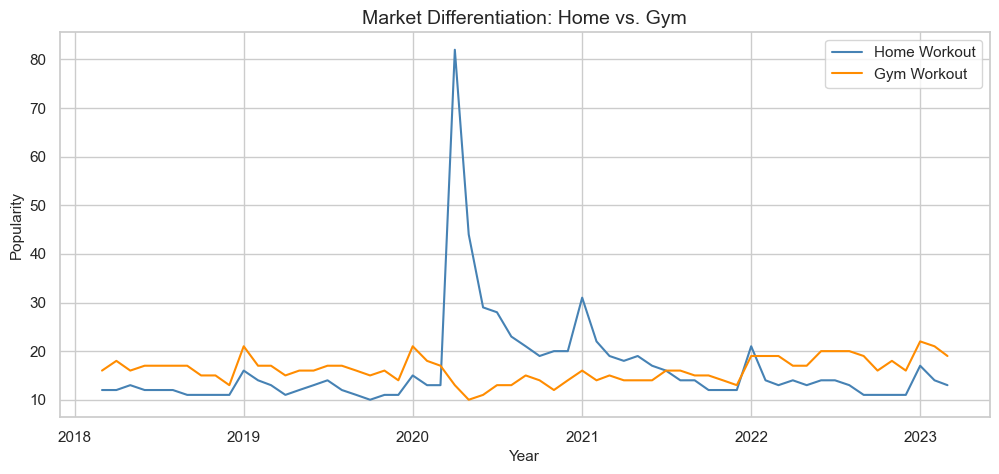

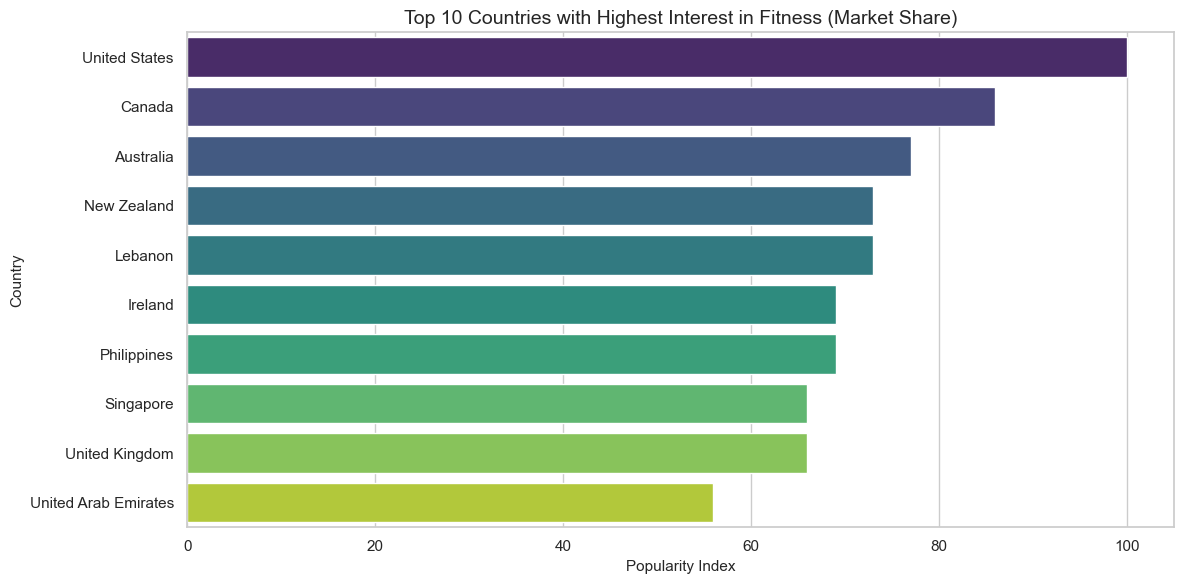

🚀 ¡Todo listo! Las 3 imágenes han sido guardadas en tu carpeta de trabajo.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Configuración de carpetas y carga de datos
data_folder = 'data'
sns.set_theme(style="whitegrid")

try:
    # Carga de archivos
    df_workout = pd.read_csv(os.path.join(data_folder, 'workout.csv'), parse_dates=['month'])
    df_keywords = pd.read_csv(os.path.join(data_folder, 'three_keywords.csv'), parse_dates=['month'])
    df_geo = pd.read_csv(os.path.join(data_folder, 'workout_geo.csv'))
    
    print("✅ Archivos cargados correctamente. Generando gráficas...")

    # --- GRÁFICA 1: Tendencia Global "Workout" ---
    plt.figure(figsize=(12, 5))
    plt.plot(df_workout['month'], df_workout.iloc[:, 1], color='black', linewidth=1.5)
    plt.axvline(pd.Timestamp('2020-04-01'), color='red', linestyle='--', label='Pandemic Peak (April 2020)')
    plt.title('Global Search Trend: "Workout"', fontsize=14)
    plt.xlabel('Year', fontsize=11)
    plt.ylabel('Popularity Index', fontsize=11)
    plt.legend()
    plt.savefig('fitness_trend_global.png', dpi=300)
    plt.show()

    # --- GRÁFICA 2: Home Workout vs Gym Workout ---
    plt.figure(figsize=(12, 5))
    plt.plot(df_keywords['month'], df_keywords.iloc[:, 1], label='Home Workout', color='steelblue')
    plt.plot(df_keywords['month'], df_keywords.iloc[:, 2], label='Gym Workout', color='darkorange')
    plt.title('Market Differentiation: Home vs. Gym', fontsize=14)
    plt.xlabel('Year', fontsize=11)
    plt.ylabel('Popularity', fontsize=11)
    plt.legend()
    plt.savefig('fitness_comparison_home_gym.png', dpi=300)
    plt.show()

    # --- GRÁFICA 3: Top 10 Países (La que faltaba) ---
    # Limpieza: Tomamos las primeras 2 columnas y ordenamos por popularidad
    top_10_countries = df_geo.sort_values(by=df_geo.columns[1], ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_10_countries, 
        x=top_10_countries.columns[1], 
        y=top_10_countries.columns[0], 
        palette='viridis'
    )
    plt.title('Top 10 Countries with Highest Interest in Fitness (Market Share)', fontsize=14)
    plt.xlabel('Popularity Index', fontsize=11)
    plt.ylabel('Country', fontsize=11)
    plt.tight_layout()
    plt.savefig('fitness_geo_ranking.png', dpi=300)
    plt.show()

    print("🚀 ¡Todo listo! Las 3 imágenes han sido guardadas en tu carpeta de trabajo.")

except FileNotFoundError:
    print(f"❌ Error: Asegúrate de que los archivos .csv estén en la carpeta '{data_folder}'")
except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")